In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
warnings.filterwarnings('ignore')

In [10]:
tickers = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS']
start_date = '2020-08-01'
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')

adj_close_df = yf.download(tickers, start=start_date, end=end_date)['Close']

log_returns = np.log(adj_close_df / adj_close_df.shift(1)).dropna()

print("--- Logarithmic Daily Returns (Last 5 Days) ---")
print(log_returns.tail())

[*********************100%***********************]  3 of 3 completed

--- Logarithmic Daily Returns (Last 5 Days) ---
Ticker      HDFCBANK.NS  RELIANCE.NS    TCS.NS
Date                                          
2025-08-08    -0.010833    -0.015668 -0.003485
2025-08-11     0.010933     0.013363  0.001448
2025-08-12    -0.012962    -0.004193 -0.001777
2025-08-13     0.005266     0.001592  0.000264
2025-08-14     0.005439    -0.002399 -0.004589


In [11]:
expected_returns = log_returns.mean() * 252
cov_matrix = log_returns.cov() * 252
expected_volatility = np.sqrt(np.diag(cov_matrix))
risk_return_df = pd.DataFrame({
    'Expected Return': expected_returns,
    'Expected Volatility (Risk)': expected_volatility
})

print("--- Annualized Expected Return and Risk ---")
print(risk_return_df)

--- Annualized Expected Return and Risk ---
             Expected Return  Expected Volatility (Risk)
Ticker                                                  
HDFCBANK.NS         0.149115                    0.222888
RELIANCE.NS         0.082961                    0.239104
TCS.NS              0.073895                    0.213159


In [17]:
risk_free_rate = 0.07

num_portfolios = 20000
num_assets = len(tickers)
results = np.zeros((3 + num_assets, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)

    portfolio_return = np.sum(expected_returns * weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = sharpe_ratio
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

results_frame = pd.DataFrame(results.T, columns=['Return','Volatility','Sharpe'] + tickers)
max_sharpe_port = results_frame.iloc[results_frame['Sharpe'].idxmax()]
min_vol_port = results_frame.iloc[results_frame['Volatility'].idxmin()]

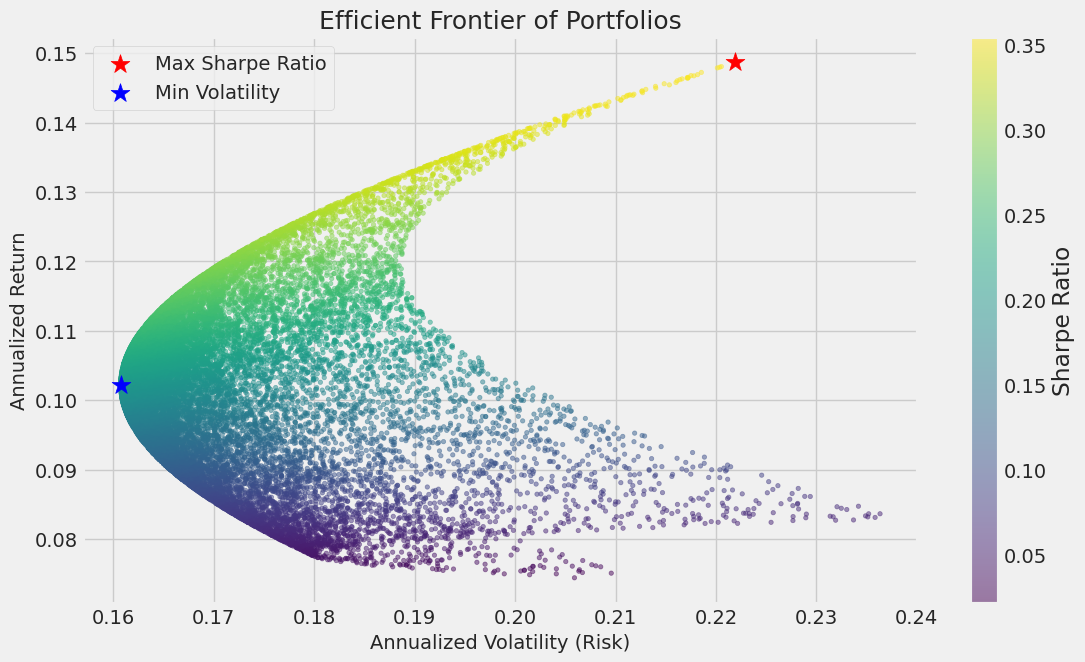

In [16]:
plt.figure(figsize=(12, 7))
plt.scatter(results_frame.Volatility, results_frame.Return, c=results_frame.Sharpe, cmap='viridis', marker='o', s=10, alpha=0.5)
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier of Portfolios', fontsize=18)
plt.xlabel('Annualized Volatility (Risk)', fontsize=14)
plt.ylabel('Annualized Return', fontsize=14)

plt.scatter(max_sharpe_port[1], max_sharpe_port[0], marker='*', color='r', s=200, label='Max Sharpe Ratio')
plt.scatter(min_vol_port[1], min_vol_port[0], marker='*', color='b', s=200, label='Min Volatility')
plt.legend()
plt.show()

In [18]:
print("\n--- Minimum Variance Portfolio ---")
print(min_vol_port.round(4))
print("\n--- Optimal Risky Portfolio (Max Sharpe Ratio) ---")
print(max_sharpe_port.round(4))


--- Minimum Variance Portfolio ---
Return         0.1020
Volatility     0.1607
Sharpe         0.1993
RELIANCE.NS    0.3457
TCS.NS         0.2360
HDFCBANK.NS    0.4183
Name: 8443, dtype: float64

--- Optimal Risky Portfolio (Max Sharpe Ratio) ---
Return         0.1490
Volatility     0.2225
Sharpe         0.3548
RELIANCE.NS    0.9979
TCS.NS         0.0003
HDFCBANK.NS    0.0018
Name: 17237, dtype: float64


Based on the provided data, Modern Portfolio Theory (MPT) offers several practical implications for portfolio selection. The Minimum Variance Portfolio serves as a direct example of diversification; by combining Reliance (34.6%), TCS (23.6%), and HDFC Bank (41.8%), an investor could achieve a total risk of 16.07%, which is lower than the individual risks of the component stocks. This portfolio, with its 10.2% expected return, would appeal to a risk-averse investor, while others seeking higher returns would select a different portfolio along the Efficient Frontier. The most significant finding is the Optimal Risky Portfolio, which, with a Sharpe Ratio of 0.3548, represents the most efficient combination of the three stocks, offering a 14.9% return for 22.25% risk. Its composition is a powerful, non-intuitive insight: the portfolio is 99.8% allocated to RELIANCE.NS, indicating that during this period, its risk-adjusted performance was so dominant that the model recommends extreme concentration to achieve maximum efficiency. According to MPT, all rational investors should hold this specific risky portfolio, blending it with risk-free assets to align with their personal risk tolerance.

#Conclusion

A comprehensive analysis of Reliance Industries, Tata Consultancy Services (TCS), and HDFC Bank reveals distinct and divergent investment profiles, providing clear insights for portfolio construction based on Modern Portfolio Theory. The data indicates that each security catered to a different investment strategy and risk tolerance during the analyzed period.

Reliance Industries emerged as the clear top performer, delivering the highest annualized return while also achieving the most favorable risk-adjusted metrics. Its superior Sharpe, Sortino, and Calmar ratios suggest it was the most efficient at generating returns relative to the total risk, downside risk, and drawdown risk encountered. This positions Reliance as the optimal choice for an investor focused on maximizing growth and who is willing to tolerate the associated volatility.

In contrast, TCS presented a more conservative and stable profile. It was characterized by lower volatility and the smallest maximum drawdown of the three, making it a suitable anchor for a risk-averse investor prioritizing capital preservation over aggressive growth. HDFC Bank demonstrated the most challenging performance, combining lower returns with significant risk, which resulted in the least attractive risk-reward trade-off in this comparison. Ultimately, the choice between these assets depends on an investor's objectives, with Reliance serving a growth mandate and TCS serving a stability mandate.